## Model 1 

This model begins the model building process by trying to build a CNN model after having difficulty with loading the images. We can now begin choosing different parameters and models. 

This notebook begins by loading the JPEG images with their corresponding severity labels. Since the images are not a subdirectory and are not annotated, we had to manually load the images and join them with its corresponding labels using ```os.path.join``` and define a function to resize, normalize and split the training and testing sets instead of the automated ```tf.keras.utils.image_dataset_from_directory``` which creates includes preprocessing and spliting of the data automatically. 

This model was succssfull in completing in obtaining accuracy and loss on the training and testing set, however, when performing prediction on the testing set was halted due to an corrupted image file or an image file with an impropoer format.

The epoch is set to 1 for the meantime while trying to figure out a reoccuring error when predicting the test set. 

___For this part there needs to be more preprocessing and data integreity check.___



Further filtering and tuning can include the following: 
* Reducing epochs and increasing image sizes to reduce loss of spatial information which can be important for detecting 
* Explore more model architecures and modifying filters 
* look at pretrained image detection models and see what aspects I can modify to detect severity with higher recall. 

In [2]:
import numpy as np
import pandas as pd
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
folder = '/Users/shivanassori/Desktop/Folders/Data_Science_Units/Capstone/dataset'
labels = '/Users/shivanassori/Desktop/Folders/Data_Science_Units/Capstone/DATASETS/train_score_dec29.csv'

In [4]:
base_image_dir = os.path.join('/Users/shivanassori/Desktop/Folders/Data_Science_Units/Capstone/dataset/train')
image_dataset = pd.read_csv(os.path.join(base_image_dir, 'train_score_dec29.csv')) 
#the images are not annotated with classes, so we need to join the csv file with the image names and labels with the images in a single path. 


image_dataset['PatientId'] = image_dataset['image'].map(lambda x: x.split('_')[0]) #getting the image ID from the image name
image_dataset['path'] = image_dataset['image'].map(lambda x: os.path.join(base_image_dir,'{}.jpeg'.format(x))) #creating a new column and appending the full file path for each image. 

image_dataset['exists'] = image_dataset['path'].map(os.path.exists) #making sure that every image exists in the labels csv and the image itself. 


print(image_dataset['exists'].sum(), 'images found of', image_dataset.shape[0], 'total') #print how many images are found in the csv and images. 
image_dataset['eye'] = image_dataset['image'].map(lambda x: 1 if x.split('_')[-1]=='left' else 0) #creating a binary column for left and right eye image. left = 1 and right =0. 

image_dataset['level_cat'] = image_dataset['level'].map(lambda x: to_categorical(x, 1+image_dataset['level'].max())) # creating a categorical column that includes one-hot encoded labels for the level of severity. 

image_dataset.dropna(inplace = True) 
image_dataset = image_dataset[image_dataset['exists']] #eliminate any labels to any images that are not found in the directory. 
image_dataset.sample(13)
#os.path.join
#code obtained from: https://www.kaggle.com/code/kmader/inceptionv3-for-retinopathy-gpu-hr 

8406 images found of 8408 total


,image,level,PatientId,path,exists,eye,level_cat
3814,18029_left,0,18029,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
4945,18618_left,0,18618,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
1733,18046_left,3,18046,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[0.0, 0.0, 0.0, 1.0, 0.0]"
8247,11091_left,0,11091,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
4466,16967_right,0,16967,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
2024,1096_right,0,1096,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
4418,13488_left,0,13488,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
5537,16510_left,2,16510,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[0.0, 0.0, 1.0, 0.0, 0.0]"
6840,1722_left,0,1722,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
3604,11130_left,0,11130,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"


In [5]:
image_dataset.to_csv('image_dataset.csv', index=False)

In [6]:
#checking again if all the images are valid 
def is_valid_image(img_path):
    try:
        img = Image.open(img_path)
        img.verify()  # Verifies if the file is a valid image
        return True
    except (IOError, SyntaxError) as e:
        print(f'Invalid image: {img_path} - {e}')
        return False
    
image_dataset['valid'] = image_dataset['path'].map(is_valid_image)

image_dataset = image_dataset[image_dataset['valid']]

image_dataset.drop(columns=['valid'], inplace=True)

print(image_dataset['exists'].sum(), 'images found of', image_dataset.shape[0], 'total')


8406 images found of 8406 total


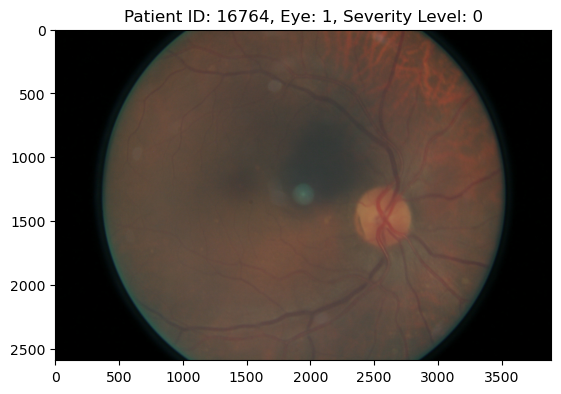

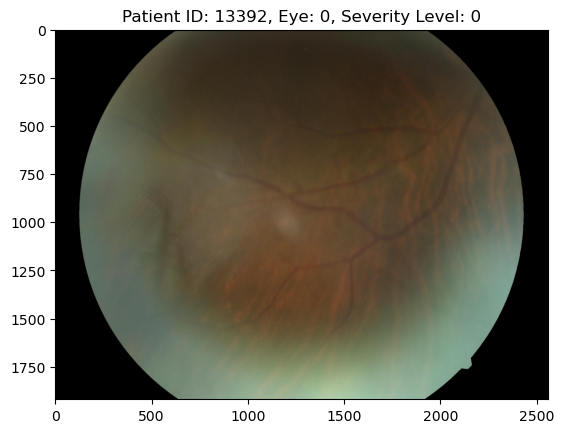

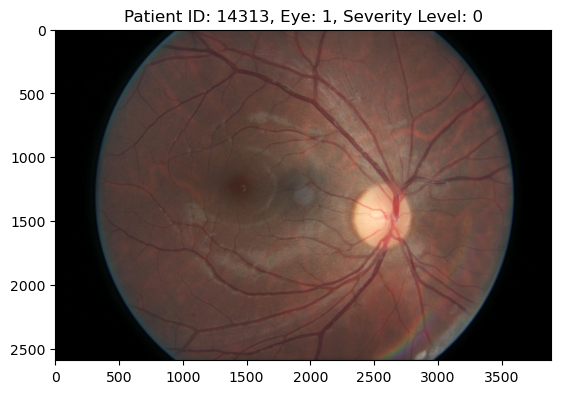

In [7]:
#viewing random images to for integrity check 
sample_indices = np.random.choice(image_dataset.index, size=3, replace=False)

for i in sample_indices:
    image = Image.open(image_dataset.loc[i, 'path'])
    plt.imshow(image)
    plt.title(f"Patient ID: {image_dataset.loc[i, 'PatientId']}, Eye: {image_dataset.loc[i, 'eye']}, Severity Level: {image_dataset.loc[i, 'level']}")
    plt.show()

In [8]:
y_array = np.array(list(image_dataset['level_cat']))

In [9]:
y_array

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [10]:
X_train, X_rem, y_train, y_rem = train_test_split(image_dataset['path'],y_array, test_size = 0.2, random_state = 42, stratify = y_array)

In [11]:
y_rem_array = np.array(list(y_rem))

In [12]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem_array, test_size = 0.5, random_state = 42, stratify = y_rem_array)

In [13]:
type(X_train)

pandas.core.series.Series

Converting my datasets to tensors for compatibility and higher efficiency with working with TensorFlow.

In [14]:
#function to take an image path and its corresponding label as input
#read the image file, decode and resize it, convert the pixel values to [0,1] by dividing by 255(normalizing)
def image_load_preprocessing(image_path, label): 
    image = tf.io.read_file(image_path) #tensorflow function that reads image file by image_path and returns a raw binary data of the image
    image = tf.image.decode_jpeg(image, channels =3) #decodes JPEG encoded image from the raw binary data, channel = 3 indicates the image is in color
    image = tf.image.resize(image,[224,224]) #ensuring all the images are the same size
    image = tf.cast(image, tf.float32)/255.0 # converts the pixel values of the image from integers to floating point and then scaling the pixel values
    return image, label


The following cell was used to iterate through the image path and identify corrupted image in the testdataset. The corrupted image and its corresponding eye pair image were removed from the folder. 

In [15]:
#def check_image(image_path): 
    #try:
        #image = Image.open(image_path).convert('RGB')
        #image = image.resize((250, 250))
        #image = np.array(image)
        #image = tf.convert_to_tensor(image)
        #image = tf.cast(image, tf.float32)/255.0 
        #return True
    #except Exception as e:
        #print(f"Error processing image file {image_path}: {e}")
        #return False

#invalid_images = [image_path for image_path in X_test if not check_image(image_path)]

#X_test = [image_path for image_path in X_test if image_path not in invalid_images]

In [16]:
#converts the level_cat column which is an array to TensorFlow tensors
y_train_tf = tf.convert_to_tensor(y_train.tolist(), dtype=tf.float32)
y_val_tf = tf.convert_to_tensor(y_val.tolist(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.tolist(), dtype=tf.float32)

In [17]:
#Creates tensorflow datasets from training and validation sets using from_tensor_slices method to create dataset of pairs(image_path, label)
#apply the image_load_preprocessing function to each element using 'map.'

train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train_tf))
train_dataset = train_dataset.map(image_load_preprocessing, num_parallel_calls = tf.data.experimental.AUTOTUNE)


In [18]:
#same thing with the other sets 
val_dataset = tf.data.Dataset.from_tensor_slices((X_val.values, y_val_tf))
val_dataset = val_dataset.map(image_load_preprocessing, num_parallel_calls = tf.data.experimental.AUTOTUNE)

In [19]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test_tf))
test_dataset = test_dataset.map(image_load_preprocessing, num_parallel_calls = tf.data.experimental.AUTOTUNE)

In [20]:
#shuffle the training dataset, batch it into batches of 32, prefetch batches to optimize performance. Same thing with the other set, except no shuffling because it is not necessary. 
#this creates a data loading pipeline when using a tensorflow dataset and apply batching, shuffling or other processes
#prefetching it asynchronously fetches the next batch of data in the background while the GPU/TPU is training on the current batch
#this is to optimize and reduce overall training time. 
#tf.data.experimental.AUTOTUNE ensures the data is selected at random orders for the learning process
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size = len(X_train)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [21]:
len(train_dataset)

211

In [22]:
len(val_dataset)

27

In [23]:
len(test_dataset)

27

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
#adding a convolution layer
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(250,250,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), 1, activation='relu',))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

In [35]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 128)       0

In [37]:
#sets up a tensorboard callback in TensorFlow's Keras API as a visualization tool that allows you to monitor and analyse
#various aspects of the machine learning model during training. 

logdir = '/Users/shivanassori/Desktop/Folders/Data_Science_Units/Capstone/logsdir'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [38]:
history = model.fit(train_dataset, epochs=1, validation_data = val_dataset)

2024-01-21 18:17:11.055420: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 1034 of 6724
2024-01-21 18:17:21.076592: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 2103 of 6724
2024-01-21 18:17:41.030696: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 4222 of 6724
2024-01-21 18:17:51.031436: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 5254 of 6724
2024-01-21 18:18:01.046597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 6248 of 6724
2024-01-21 18:18:06.010964: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


211/211 [==============================] - 200s 636ms/step - loss: 0.9133 - accuracy: 0.7286 - val_loss: 0.8841 - val_accuracy: 0.7313


In [39]:
history.history

{'loss': [0.913336455821991],
 'accuracy': [0.7285841703414917],
 'val_loss': [0.8840959072113037],
 'val_accuracy': [0.731272280216217]}

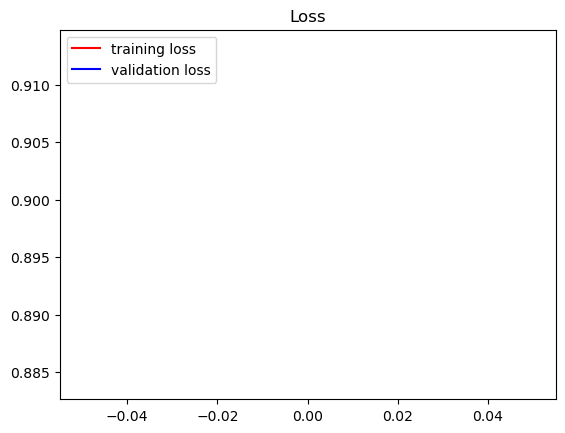

In [40]:
plt.figure()
plt.plot(history.history['loss'], color = 'red', label = 'training loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation loss')
plt.title('Loss')
plt.legend(loc = 'upper left')
plt.show()

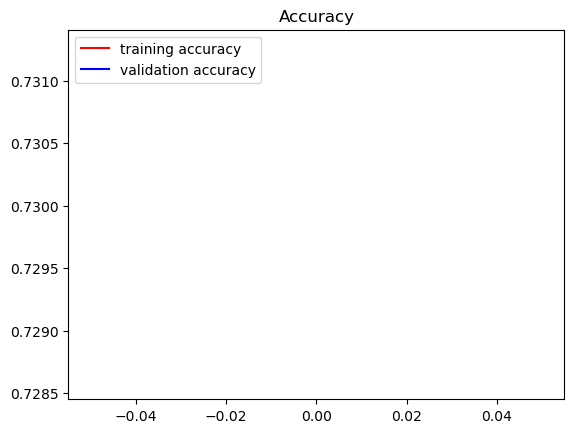

In [41]:
plt.figure()
plt.plot(history.history['accuracy'], color = 'red', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation accuracy')
plt.title('Accuracy')
plt.legend(loc = 'upper left')
plt.show()

In [42]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalCrossentropy

In [43]:
precision = Precision()
recall = Recall()
accuracy = CategoricalCrossentropy()

In [44]:
len(test_dataset)

27

In [45]:
predictions = model.predict(test_dataset)

27/27 [==============================] - 12s 439ms/step


In [46]:
# Assuming `test_dataset` is your test dataset and `model` is your trained model
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test accuracy: {test_accuracy}")

27/27 [==============================] - 12s 437ms/step - loss: 0.8824 - accuracy: 0.7313
Test accuracy: 0.731272280216217


In [47]:
y_pred = np.argmax(predictions, axis=1)

In [48]:
type(y_pred)

numpy.ndarray

In [49]:
len(y_pred)

841

In [50]:
type(y_test)

numpy.ndarray

In [24]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming `history` is the output of model.fit()
train_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]

# Assuming `y_test` and `y_pred` are your true and predicted labels
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_, y_pred, average=None, zero_division=1)

model_info = {
    'model': 'Model1_CNN_Image_Classification',
    'parameters': model.count_params(),
    'epochs': len(history.history['accuracy']),
    'train_accuracy': train_accuracy,
    'validation_accuracy': validation_accuracy,
    'precision': precision.tolist(),
    'recall': recall.tolist(),
    'f1_score': f1_score.tolist(),
}

print(model_info)


NameError: name 'history' is not defined

In [ ]:
confusion_matrix = confusion_matrix(y_test_edit, y_pred)
print("Confusion Matrix")
print(confusion_matrix)

classification_report = classification_report(y_test_edit, y_pred)
print("Classification Report")
print(classification_report)

Confusion Matrix
[[615   0   0   0   0]
 [ 59   0   0   0   0]
 [128   0   0   0   0]
 [ 22   0   0   0   0]
 [ 17   0   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       615
           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00       128
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        17

    accuracy                           0.73       841
   macro avg       0.15      0.20      0.17       841
weighted avg       0.53      0.73      0.62       841



/Users/shivanassori/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shivanassori/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shivanassori/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ResNet50


In [25]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the base model from the pre-trained model ResNet50
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(5, activation='softmax')  # Assuming you have 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data = val_dataset, epochs=5)  # Assuming batch size of 32

Epoch 1/5


2024-01-21 19:16:26.259687: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 1090 of 6724
2024-01-21 19:16:36.269590: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 2180 of 6724
2024-01-21 19:16:56.250755: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 4341 of 6724
2024-01-21 19:17:06.260192: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 5389 of 6724
2024-01-21 19:17:16.268126: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 6468 of 6724
2024-01-21 19:17:18.765668: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


211/211 [==============================] - 282s 1s/step - loss: 0.9050 - accuracy: 0.7214 - val_loss: 0.8874 - val_accuracy: 0.7313
Epoch 2/5


2024-01-21 19:21:07.763080: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 812 of 6724
2024-01-21 19:21:17.770981: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 1621 of 6724
2024-01-21 19:21:27.808325: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 2451 of 6724
2024-01-21 19:21:47.768752: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 4179 of 6724
2024-01-21 19:21:57.775720: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 5099 of 6724
2024-01-21 19:22:15.156066: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


211/211 [==============================] - 324s 1s/step - loss: 0.8854 - accuracy: 0.7314 - val_loss: 0.8802 - val_accuracy: 0.7313
Epoch 3/5


2024-01-21 19:26:31.785919: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 871 of 6724
2024-01-21 19:26:51.701611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 2616 of 6724
2024-01-21 19:27:01.706211: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 3505 of 6724
2024-01-21 19:27:11.712497: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 4397 of 6724
2024-01-21 19:27:21.747633: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 5290 of 6724
2024-01-21 19:27:37.569313: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


211/211 [==============================] - 337s 1s/step - loss: 0.8824 - accuracy: 0.7314 - val_loss: 0.8841 - val_accuracy: 0.7313
Epoch 4/5


2024-01-21 19:32:08.332512: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 831 of 6724
2024-01-21 19:32:28.258458: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 2479 of 6724
2024-01-21 19:32:38.283508: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 3326 of 6724
2024-01-21 19:32:58.280961: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 5029 of 6724
2024-01-21 19:33:18.243310: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 6720 of 6724
2024-01-21 19:33:18.263144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


KeyboardInterrupt: 